# COMP1800 - Data Visualization (Coursework)
<u>Introduction</u>: The task embarked upon involves a comprehensive analysis of ChrisCo, a fictional cinema chain in the UK, through the lens of data visualization. The process entails compiling and examining data to glean insights into the company's operations, customer demographics, and financial performance. This Jupyter Notebook outlines the steps taken and achievements made using Python, specifically within a Visual Studio Code environment.

#### Setting Up a Python Environment

Setting up a dedicated Python environment is essential for managing dependencies in data science projects. You can use either Anaconda or Miniconda for this purpose.

**Creating and Activating a New Environment**:


```bash
conda create --name COMP1800-DV python=3.10.10
conda activate COMP1800-DV
```


#### Installing Required Packages

Ensure all necessary packages are installed by using a `pip install` command that references a [`requirements.txt`](../Docs/requirements.txt) file. This file lists all packages needed to run the Jupyter notebook effectively.

**Installing Packages**:
```python
%pip install -r ../Docs/requirements.txt --quiet
```
Note that the `--quiet` flag is used to suppress any unnecessary output from package installation, which can make it easier to see when there are errors.

**Setting Up an IPython Kernel for Jupyter**:
To use the new Python environment in Jupyter, install a new IPython kernel with the environment.


```bash
python -m ipykernel install --user --name=COMP1800-DV --display-name "COMP1800-DV(IPYNB)"
conda install -n COMP1800-DV ipykernel --update-deps --force-reinstall
```


This creates a kernel named `COMP1800-DV` for Jupyter, ensuring it uses the specific Python environment created for this coursework.

In [11]:
%pip install -r ../Docs/requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


## Data Collection
Access and download the specific datasets from the provided links by replacing 'ID' with student ID number.

**Downloading  Datasets**:
```python
%run ../Datasets/download.py
```
This will download the datasets specified in coursework specificatiom into the 'Datasets' directory specified by the `directory` variable in [`download.py`](../Datasets/download.py).

In [12]:
%run ../Datasets/download.py

Downloaded and saved CinemaWeeklyVisitors.csv successfully.
Downloaded and saved CinemaAge.csv successfully.
Downloaded and saved CinemaCapacity.csv successfully.
Downloaded and saved CinemaMarketing.csv successfully.
Downloaded and saved CinemaOverheads.csv successfully.
Downloaded and saved CinemaSpend.csv successfully.


## Importing Libraries
Importing necessary libraries needed for the this coursework.

In [31]:
try:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    import matplotlib.dates as mdates
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots

    # Setting seaborn theme for better visuals
    sns.set_theme(style="whitegrid")
except Exception as e:
    print(f"Error : {e}")

## Loading and Inspecting the Dataset
Datasets spanning weekly visitors, cinema ages, capacities, marketing expenditures, overheads, and customer spend were meticulously gathered and loaded for subsequent analysis.

In [32]:
# Load the datasets
directory = '../Datasets/'
age_df = pd.read_csv(f'{directory}CinemaAge.csv')
capacity_df = pd.read_csv(f'{directory}CinemaCapacity.csv')
marketing_df = pd.read_csv(f'{directory}CinemaMarketing.csv')
overheads_df = pd.read_csv(f'{directory}CinemaOverheads.csv')
spend_df = pd.read_csv(f'{directory}CinemaSpend.csv')
weekly_visitors_df = pd.read_csv(f'{directory}CinemaWeeklyVisitors.csv')

# Display the first few rows of each dataframe to understand their structure
display(age_df.head(), capacity_df.head(), marketing_df.head(), overheads_df.head(), spend_df.head(), weekly_visitors_df.head())

,Id,Avg age (yrs)
0,UDD,27
1,CCX,38
2,VJV,41
3,WVA,45
4,AKA,26


,Id,Seating capacity
0,UDD,163
1,CCX,30
2,VJV,449
3,WVA,181
4,AKA,43


,Id,Marketing (£000s)
0,UDD,5
1,CCX,2
2,VJV,13
3,WVA,24
4,AKA,2


,Id,Overheads (£000s)
0,UDD,65
1,CCX,18
2,VJV,87
3,WVA,58
4,AKA,13


,Id,Avg spend (£)
0,UDD,15
1,CCX,19
2,VJV,15
3,WVA,15
4,AKA,12


,Date,UDD,CCX,VJV,WVA,AKA,JJQ,SJE,WQW,ZWY,...,TJN,TPY,TVJ,SDT,WKL,CWN,XQE,VPG,YCI,RPQ
0,2019-01-01,372,0,845,923,0,163,314,160,191,...,411,436,224,0,109,0,177,927,141,326
1,2019-01-08,378,0,1012,725,0,148,303,195,165,...,442,444,342,0,123,0,160,714,125,252
2,2019-01-15,360,0,944,1174,0,151,332,183,120,...,478,517,321,0,135,0,164,902,131,402
3,2019-01-22,347,0,905,796,0,152,319,199,137,...,505,406,231,0,110,0,212,901,129,265
4,2019-01-29,387,0,975,857,0,147,301,183,146,...,486,415,262,0,128,0,157,887,136,295


## Creating Dataframes
**Summary DataFrame**: This includes one row for each cinema, with details such as average age of visitors, seating capacity, marketing spend, overheads, and average spend per visitor.

**Customer DataFrame**: This is derived from the weekly visitors data, reformatted to include one row for each date with the cinema ID and the number of weekly visitors.

In [33]:
# Create the summary dataframe by merging the individual dataframes on the 'Id' column
summary_df = pd.merge(age_df, capacity_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, marketing_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, overheads_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, spend_df, on='Id', how='inner')

# Rename columns for clarity
summary_df.columns = ['Cinema ID', 'Average Age (Years)', 'Seating Capacity', 'Marketing Spend (£000s)', 'Overheads (£000s)', 'Average Spend (£)']

# The customer dataframe will be the weekly visitors dataframe as it already represents one row per date
customer_df = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")

display(summary_df.head(), summary_df.tail(), customer_df.head(), customer_df.tail())

,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
0,UDD,27,163,5,65,15
1,CCX,38,30,2,18,19
2,VJV,41,449,13,87,15
3,WVA,45,181,24,58,15
4,AKA,26,43,2,13,12


,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
25,CWN,33,30,1,62,9
26,XQE,27,36,4,66,12
27,VPG,36,261,8,97,15
28,YCI,45,47,5,23,25
29,RPQ,26,100,7,79,13


,Date,Cinema ID,Weekly Visitors
0,2019-01-01,UDD,372
1,2019-01-08,UDD,378
2,2019-01-15,UDD,360
3,2019-01-22,UDD,347
4,2019-01-29,UDD,387


,Date,Cinema ID,Weekly Visitors
6265,2022-11-29,RPQ,259
6266,2022-12-06,RPQ,315
6267,2022-12-13,RPQ,262
6268,2022-12-20,RPQ,252
6269,2022-12-27,RPQ,247


## Exploratory Data Analysis
**Exploratory Data Analysis (EDA)**: Conduct an initial analysis to understand the dataset's structure, contents, and any immediate insights or anomalies.

Summary DataFrame Descriptive Statistics:


,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,35.333333,116.433333,6.633333,63.733333,16.333333
std,6.503757,102.277069,7.246799,27.406183,4.837592
min,26.000000,30.000000,1.000000,13.000000,8.000000
25%,29.250000,37.750000,2.000000,49.250000,13.000000
50%,36.000000,88.000000,5.000000,67.500000,15.000000
75%,41.000000,161.500000,7.750000,85.500000,20.750000
max,45.000000,449.000000,35.000000,99.000000,25.000000



Correlation Matrix:


,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
Average Age (Years),1.000000,0.037670,0.200223,-0.069903,0.595856
Seating Capacity,0.037670,1.000000,0.700083,0.286457,-0.139132
Marketing Spend (£000s),0.200223,0.700083,1.000000,0.116860,0.023279
Overheads (£000s),-0.069903,0.286457,0.116860,1.000000,-0.231567
Average Spend (£),0.595856,-0.139132,0.023279,-0.231567,1.000000


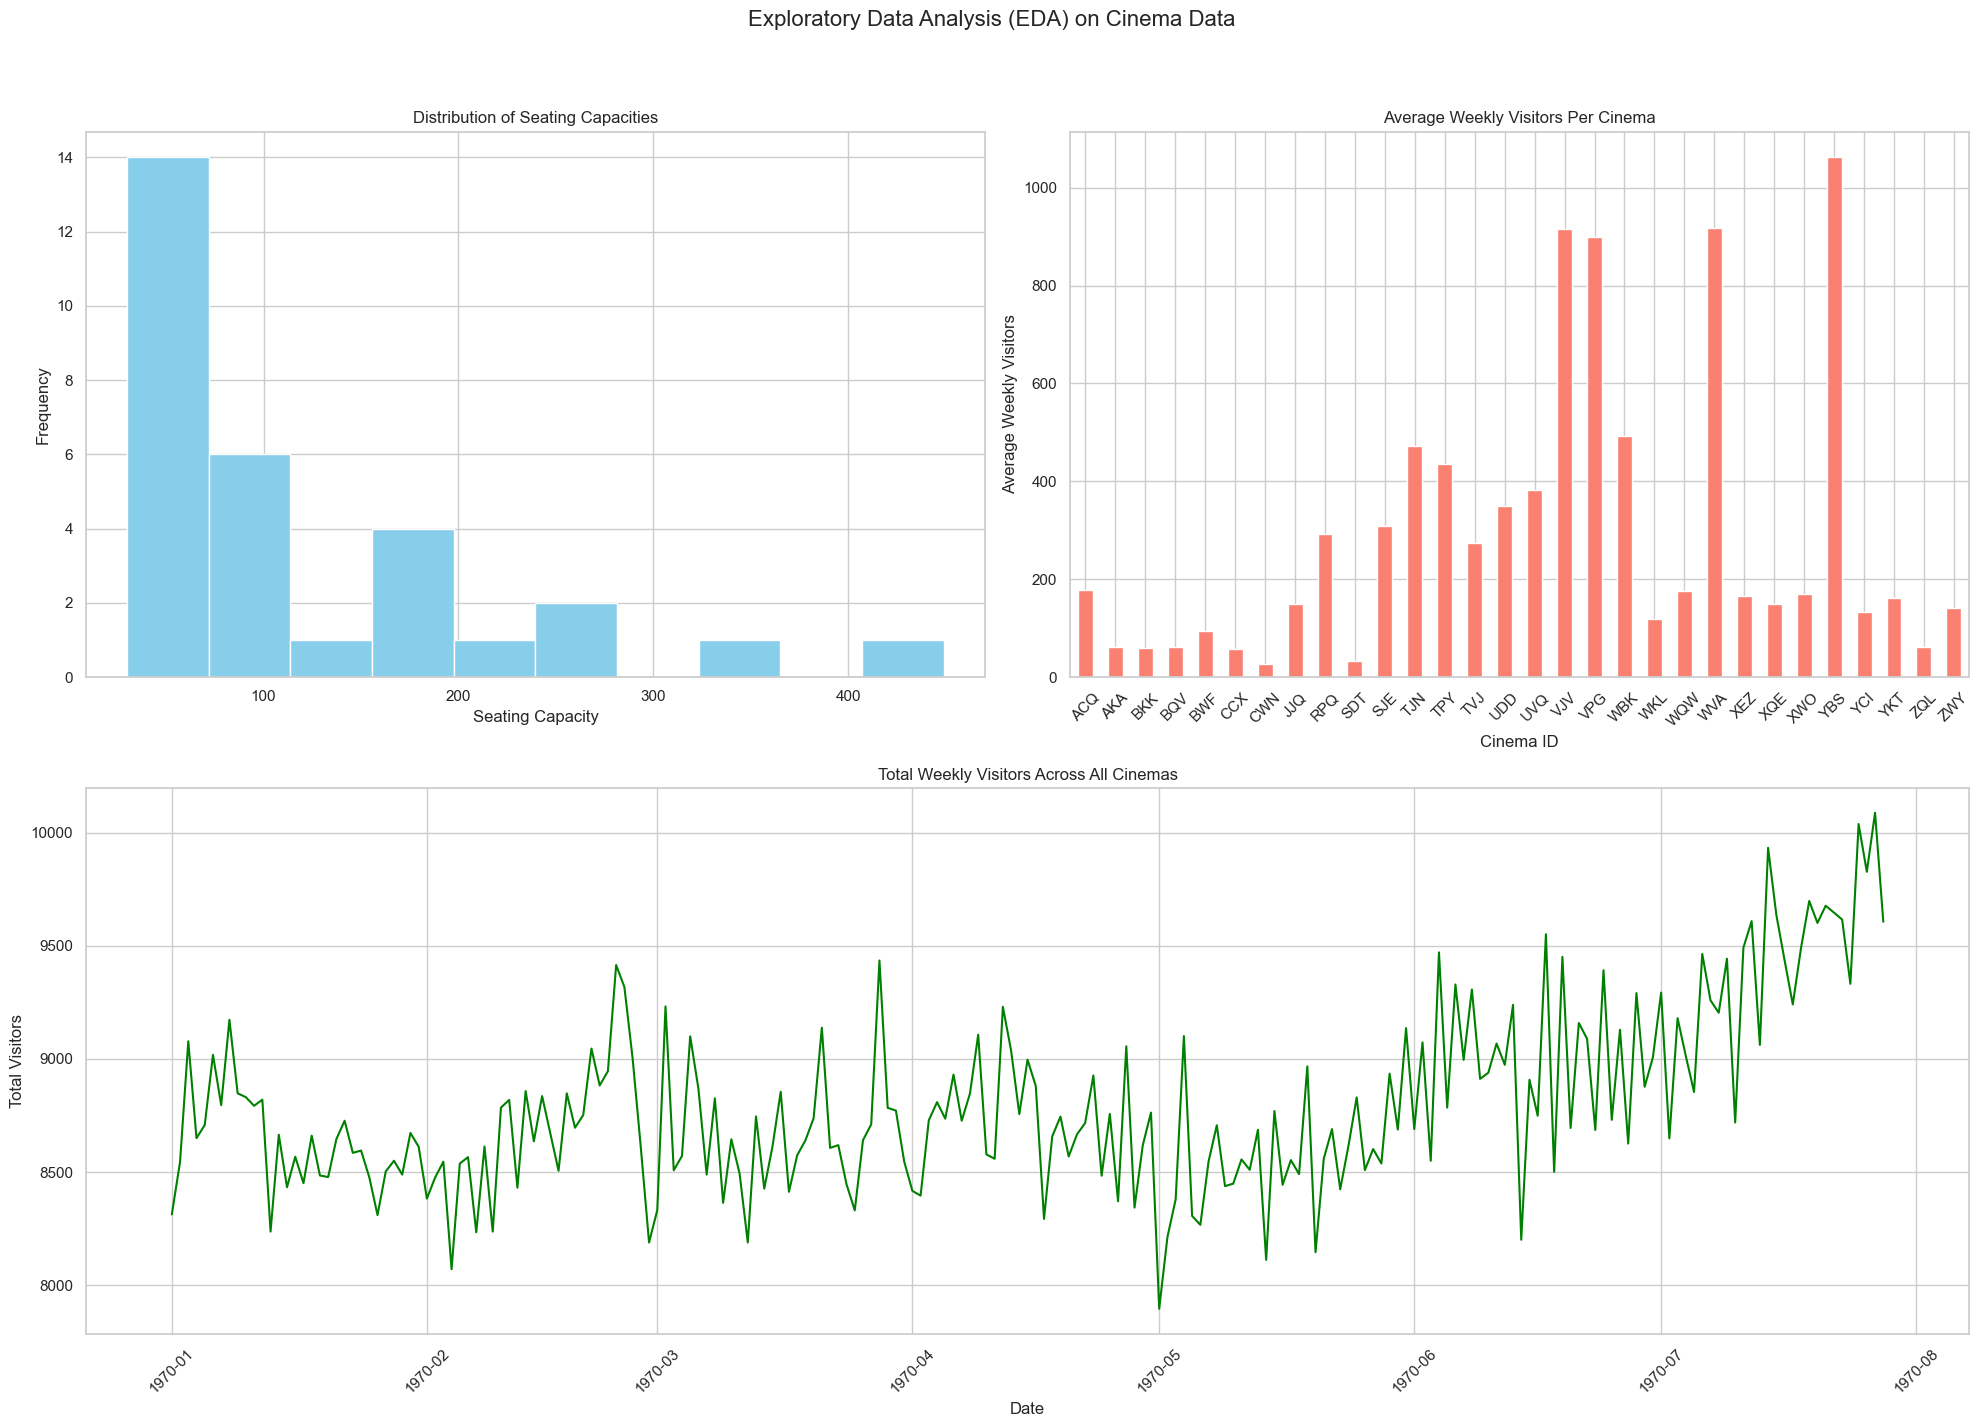

In [34]:
# Descriptive Statistics for Summary DataFrame
print("Summary DataFrame Descriptive Statistics:")
display(summary_df.describe())

# Exclude non-numeric columns and then calculate correlation for Summary DataFrame
numeric_cols_summary_df = summary_df.select_dtypes(include=[ 'float64', 'int64' ])
print("\nCorrelation Matrix:")
display(numeric_cols_summary_df.corr())

# Set up a figure with a gridspec
fig = plt.figure(figsize=(20, 15))  # Adjust the size as needed
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[3, 3])
fig.suptitle('Exploratory Data Analysis (EDA) on Cinema Data', fontsize=16)

# Plot 1: Distribution of Seating Capacities
ax0 = fig.add_subplot(gs[0, 0])
summary_df['Seating Capacity'].hist(color='skyblue')
ax0.set_title('Distribution of Seating Capacities')
ax0.set_xlabel('Seating Capacity')
ax0.set_ylabel('Frequency')

# Plot 2: Average Weekly Visitors Per Cinema
ax1 = fig.add_subplot(gs[0, 1])
average_visits_per_cinema = customer_df.groupby('Cinema ID')['Weekly Visitors'].mean()
average_visits_per_cinema.plot(kind='bar', color='salmon')
ax1.set_title('Average Weekly Visitors Per Cinema')
ax1.set_xlabel('Cinema ID')
ax1.set_ylabel('Average Weekly Visitors')
ax1.tick_params(axis='x', rotation=45)

# Plot 3: Total Weekly Visitors Across All Cinemas
ax2 = fig.add_subplot(gs[1, :])
total_visitors_per_week = customer_df.groupby('Date')['Weekly Visitors'].sum()
ax2.plot(total_visitors_per_week.index, total_visitors_per_week.values, label='Average Weekly Visitors', color='green')
ax2.set_title('Total Weekly Visitors Across All Cinemas')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Visitors')
ax2.tick_params(axis='x', rotation=45)
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Adjust layout and show the dashboard
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle as needed for the title
plt.show()

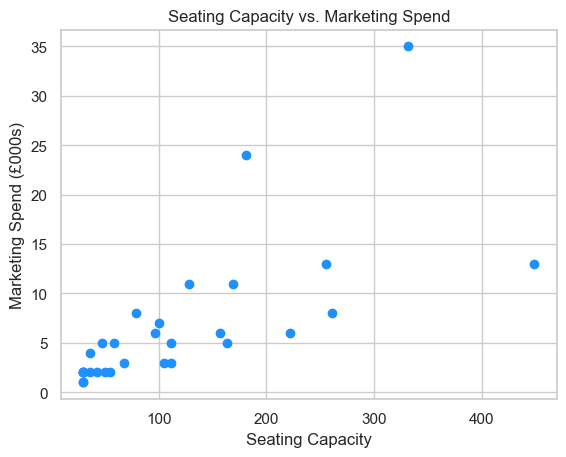

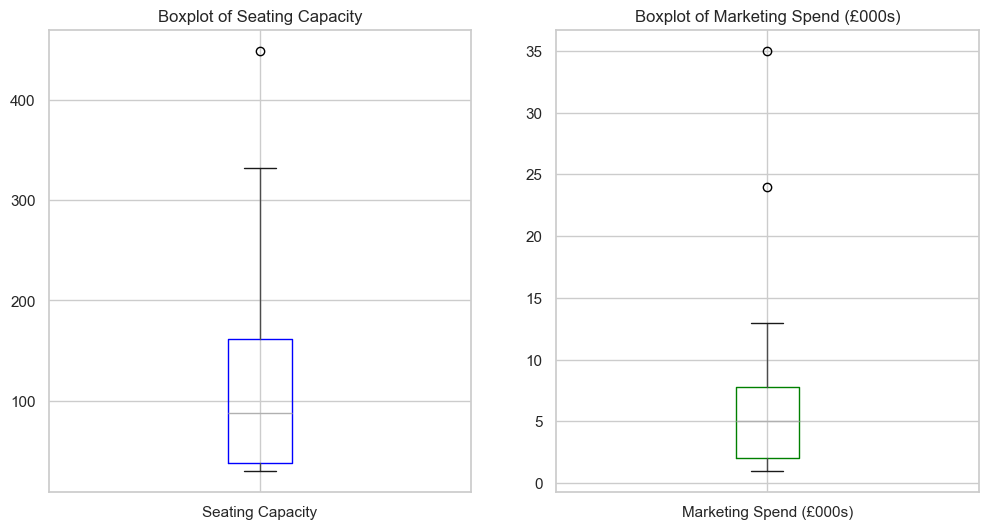

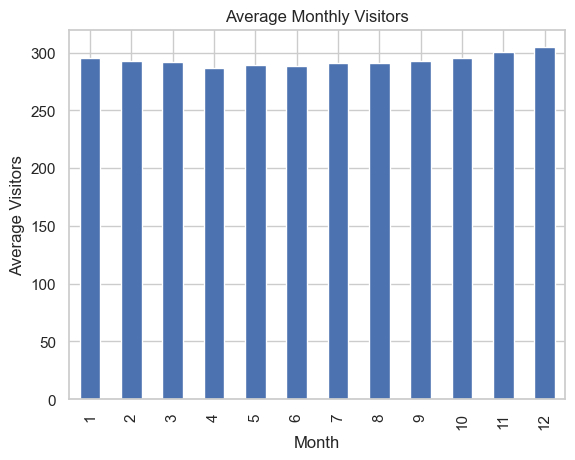

In [17]:
# Scatter plot to examine the relationship between Seating Capacity and Marketing Spend
plt.scatter(summary_df['Seating Capacity'], summary_df['Marketing Spend (£000s)'], c='dodgerblue')
plt.title('Seating Capacity vs. Marketing Spend')
plt.xlabel('Seating Capacity')
plt.ylabel('Marketing Spend (£000s)')
plt.show()

# Boxplot for Seating Capacity and Marketing Spend to look for outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
summary_df.boxplot(column='Seating Capacity', ax=axes[0], boxprops=dict(color="blue"))
axes[0].set_title('Boxplot of Seating Capacity')
summary_df.boxplot(column='Marketing Spend (£000s)', ax=axes[1], boxprops=dict(color="green"))
axes[1].set_title('Boxplot of Marketing Spend (£000s)')

plt.show()

# Seasonality in visitor numbers
customer_df['Date'] = pd.to_datetime(customer_df['Date'])
customer_df.set_index('Date', inplace=True)
customer_df['Weekly Visitors'].groupby(customer_df.index.month).mean().plot(kind='bar')
plt.title('Average Monthly Visitors')
plt.xlabel('Month')
plt.ylabel('Average Visitors')
plt.show()

In [35]:
# Load the data from the CSV files
cinema_age = pd.read_csv(f'{directory}CinemaAge.csv')
cinema_capacity = pd.read_csv(f'{directory}CinemaCapacity.csv')
cinema_marketing = pd.read_csv(f'{directory}CinemaMarketing.csv')
cinema_overheads = pd.read_csv(f'{directory}CinemaOverheads.csv')
cinema_spend = pd.read_csv(f'{directory}CinemaSpend.csv')
cinema_weekly_visitors = pd.read_csv(f'{directory}CinemaWeeklyVisitors.csv')

# Display the first few rows of each dataframe to understand their structure
dataframes = {
    "Cinema Age": cinema_age,
    "Cinema Capacity": cinema_capacity,
    "Cinema Marketing": cinema_marketing,
    "Cinema Overheads": cinema_overheads,
    "Cinema Spend": cinema_spend,
    "Cinema Weekly Visitors": cinema_weekly_visitors
}

# Show the first few rows of each dataframe
for name, df in dataframes.items():
    print(f"{name}:\n", df.head(), "\n\n")


Cinema Age:
     Id  Avg age (yrs)
0  UDD             27
1  CCX             38
2  VJV             41
3  WVA             45
4  AKA             26 


Cinema Capacity:
     Id  Seating capacity
0  UDD               163
1  CCX                30
2  VJV               449
3  WVA               181
4  AKA                43 


Cinema Marketing:
     Id  Marketing (£000s)
0  UDD                  5
1  CCX                  2
2  VJV                 13
3  WVA                 24
4  AKA                  2 


Cinema Overheads:
     Id  Overheads (£000s)
0  UDD                 65
1  CCX                 18
2  VJV                 87
3  WVA                 58
4  AKA                 13 


Cinema Spend:
     Id  Avg spend (£)
0  UDD             15
1  CCX             19
2  VJV             15
3  WVA             15
4  AKA             12 


Cinema Weekly Visitors:
          Date  UDD  CCX   VJV   WVA  AKA  JJQ  SJE  WQW  ZWY  ...  TJN  TPY  \
0  2019-01-01  372    0   845   923    0  163  314  160  191  ...  411 

In [36]:
# Merging static data (Age, Capacity, Marketing, Overheads, Spend) into a single dataframe on 'Id'
static_data = pd.merge(cinema_age, cinema_capacity, on='Id', how='outer')
static_data = pd.merge(static_data, cinema_marketing, on='Id', how='outer')
static_data = pd.merge(static_data, cinema_overheads, on='Id', how='outer')
static_data = pd.merge(static_data, cinema_spend, on='Id', how='outer')

# Preparing the weekly visitors data for aggregation
# Transpose the weekly visitors dataframe to get one row per cinema with dates as columns
cinema_weekly_visitors_transposed = cinema_weekly_visitors.melt(id_vars=["Date"], 
                                                                var_name="Id", 
                                                                value_name="Visitors")
# Convert 'Date' to datetime to facilitate time-based analysis
cinema_weekly_visitors_transposed['Date'] = pd.to_datetime(cinema_weekly_visitors_transposed['Date'])

# Aggregate visitors data to calculate total visits and average visits per cinema
visitors_summary = cinema_weekly_visitors_transposed.groupby("Id").agg(Total_Visits=('Visitors', 'sum'),
                                                                        Avg_Visits=('Visitors', 'mean')).reset_index()

# Combine the static data with the aggregated visitors data
summary_data = pd.merge(static_data, visitors_summary, on='Id', how='outer')

# To categorize cinemas based on volume of visits, we will segment the 'Total_Visits' into high, medium, and low tiers
# Determine the thresholds for high, medium, and low volume cinemas
total_visits_quartiles = summary_data['Total_Visits'].quantile([0.33, 0.66])

# Define function to categorize cinemas based on visit volume
def categorize_volume(row, thresholds):
    if row['Total_Visits'] <= thresholds[0.33]:
        return 'Low'
    elif row['Total_Visits'] <= thresholds[0.66]:
        return 'Medium'
    else:
        return 'High'

# Apply categorization
summary_data['Volume_Category'] = summary_data.apply(lambda row: categorize_volume(row, total_visits_quartiles), axis=1)

# Display the summary data with volume categories
summary_data.head(), summary_data['Volume_Category'].value_counts()

(    Id  Avg age (yrs)  Seating capacity  Marketing (£000s)  Overheads (£000s)  \
 0  ACQ             26                68                  3                 98   
 1  AKA             26                43                  2                 13   
 2  BKK             39                30                  2                 47   
 3  BQV             33                36                  2                 69   
 4  BWF             29                30                  2                 22   
 
    Avg spend (£)  Total_Visits  Avg_Visits Volume_Category  
 0              8         37303  178.483254          Medium  
 1             12         12758   61.043062             Low  
 2             24         12539   59.995215             Low  
 3             21         12729   60.904306             Low  
 4             13         19756   94.526316             Low  ,
 Volume_Category
 Medium    10
 Low       10
 High      10
 Name: count, dtype: int64)

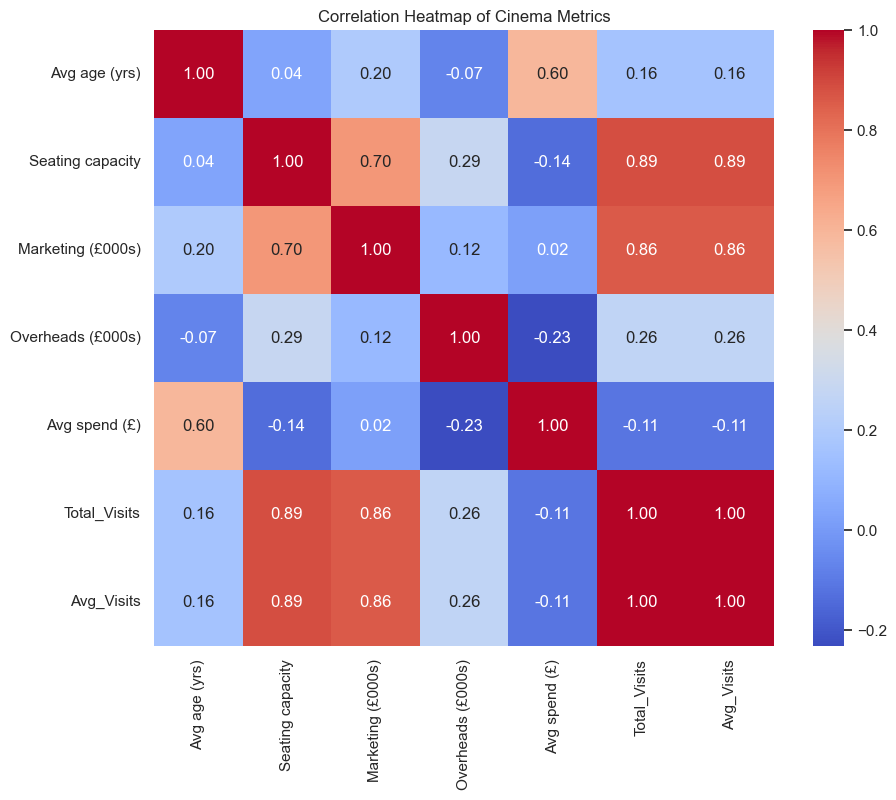

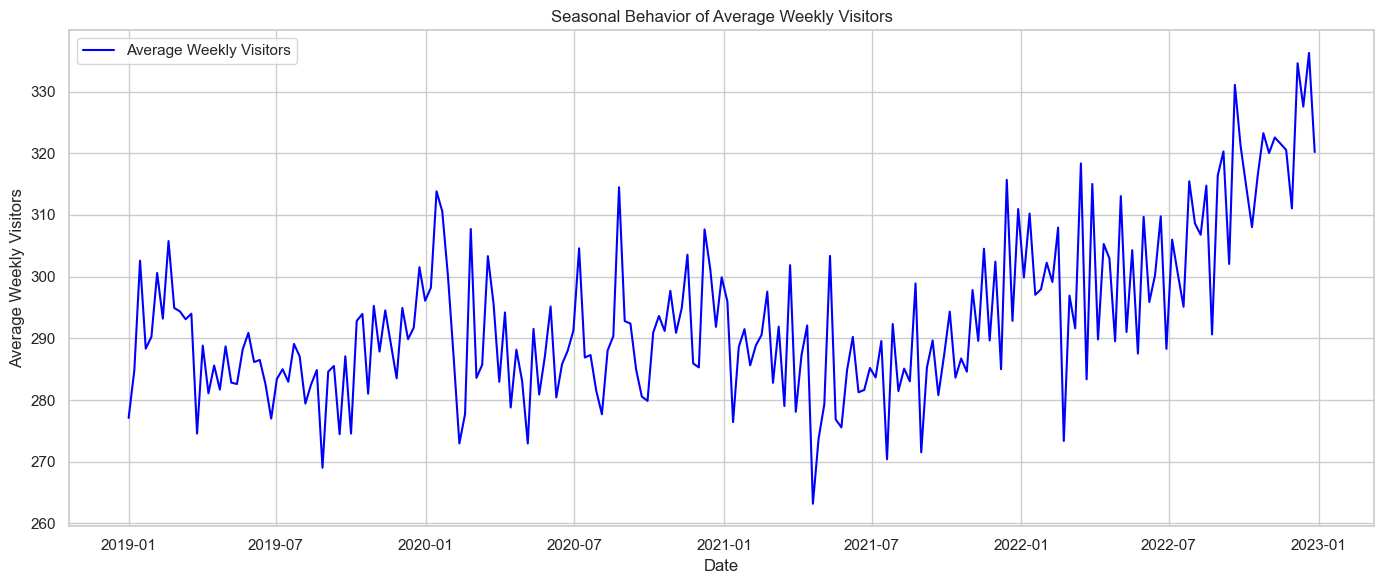

In [23]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Correlation heatmap for static metrics and total visits
plt.figure(figsize=(10, 8))
corr = summary_data.drop(['Id', 'Volume_Category'], axis=1).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cinema Metrics")
plt.show()

# Seasonal behavior: Average weekly visitors across all cinemas over time
# Calculating average weekly visitors for all cinemas
average_weekly_visitors = cinema_weekly_visitors.drop('Date', axis=1).mean(axis=1)
dates = pd.to_datetime(cinema_weekly_visitors['Date'])

# Plotting the seasonal behavior
plt.figure(figsize=(14, 6))
plt.plot(dates, average_weekly_visitors, label='Average Weekly Visitors', color='blue')
plt.title('Seasonal Behavior of Average Weekly Visitors')
plt.xlabel('Date')
plt.ylabel('Average Weekly Visitors')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
fig = px.scatter(summary_data, x='Avg spend (£)', y='Total_Visits',
                 color='Volume_Category', hover_name='Id',
                 title='Average Spend vs. Total Visits by Cinema Volume Category')

fig.update_layout(transition_duration=500)
fig.show()

In [25]:
# Creating a subplot
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Adding each cinema as a trace
for cinema in cinema_weekly_visitors.columns[1:]:  # Skipping the 'Date' column
    fig.add_trace(go.Scatter(x=cinema_weekly_visitors['Date'], y=cinema_weekly_visitors[cinema],
                             name=cinema, mode='lines'), secondary_y=False)

# Updating layout for better readability
fig.update_layout(title_text='Weekly Visitors Over Time by Cinema',
                  xaxis_title='Date',
                  yaxis_title='Weekly Visitors')

# Adding the interactive functionality to toggle traces
fig.update_layout(updatemenus=[go.layout.Updatemenu(type="buttons", direction="right",
                                                    x=0.7, y=1.2,
                                                    showactive=True,
                                                    buttons=list([
                                                        dict(label="All",
                                                             method="update",
                                                             args=[{"visible": [True] * len(cinema_weekly_visitors.columns[1:])},
                                                                   {"title": "Weekly Visitors Over Time by Cinema"}]),
                                                        dict(label="None",
                                                             method="update",
                                                             args=[{"visible": [False] * len(cinema_weekly_visitors.columns[1:])},
                                                                   {"title": "Weekly Visitors Over Time by Cinema"}])
                                                    ]))])

fig.show()